# Housing

---
embed-resources: true
---

## Introduction

The purpose of this report is to develop a model that can predict the sale price of a home given a large number of features about the home. This model can be used on our website to help buyers evaluate list prices and to help sellers price their home.

## Methods

In [84]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from joblib import dump

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_absolute_percentage_error

### Data

In [85]:
# load data
housing_train = pd.read_parquet(
    "https://cs307.org/lab/data/housing-train.parquet",
)
housing_test = pd.read_parquet(
    "https://cs307.org/lab/data/housing-test.parquet",
)

# create X and y for train dataset
X_train = housing_train.drop("SalePrice", axis=1)
y_train = housing_train["SalePrice"]

# create X and y for test dataset
X_test = housing_test.drop("SalePrice", axis=1)
y_test = housing_test["SalePrice"]

Each observation in the dataset represents the sale of a single home in Aimes, Iowa between 2006 and 2010. The data dictionary is detailed below.

### Response
**`SalePrice`**
- [int64] Sale price

### Features
**`Order`**
- [int64] Observation number

**`PID`**
- [int64] Parcel identification number - can be used with city web site for parcel review

**`MS SubClass`**
- [int64] Identifies the type of dwelling involved in the sale

**`MS Zoning`**
- [object] Identifies the general zoning classification of the sale.

**`Lot Frontage`**
- [float64] Linear feet of street connected to property

**`Lot Area`**
- [int64] Lot size in square feet

**`Street`**
- [object] Type of road access to property

**`Alley`**
- [object] Type of alley access to property

**`Lot Shape`**
- [object] General shape of property

**`Land Contour`**
- [object] Flatness of the property

**`Utilities`**
- [object] Type of utilities available

**`Lot Config`**
- [object] Lot configuration

**`Land Slope`**
- [object] Slope of property

**`Neighborhood`**
- [object] Physical locations within Ames city limits (map available)

**`Condition 1`**
- [object] Proximity to various conditions

**`Condition 2`**
- [object] Proximity to various conditions (if more than one is present)

**`Bldg Type`**
- [object] Type of dwelling

**`House Style`**
- [object] Style of dwelling

**`Overall Qual`**
- [int64] Rates the overall material and finish of the house

**`Overall Cond`**
- [int64] Rates the overall condition of the house

**`Year Built`**
- [int64] Original construction date

**`Year Remod/Add`**
- [int64] Remodel date (same as construction date if no remodeling or additions)

**`Roof Style`**
- [object] Type of roof

**`Roof Matl`**
- [object] Roof material

**`Exterior 1st`**
- [object] Exterior covering on house

**`Exterior 2nd`**
- [object] Exterior covering on house (if more than one material)

**`Mas Vnr Type`**
- [object] Masonry veneer type

**`Mas Vnr Area`**
- [float64] Masonry veneer area in square feet

**`Exter Qual`**
- [object] Evaluates the quality of the material on the exterior

**`Exter Cond`**
- [object] Evaluates the present condition of the material on the exterior

**`Foundation`**
- [object] Type of foundation

**`Bsmt Qual`**
- [object] Evaluates the height of the basement

**`Bsmt Cond`**
- [object] Evaluates the general condition of the basement

**`Bsmt Exposure`**
- [object] Refers to walkout or garden level walls

**`BsmtFin Type 1`**
- [object] Rating of basement finished area

**`BsmtFin SF 1`**
- [float64] Type 1 finished square feet

**`BsmtFin Type 2`**
- [object] Rating of basement finished area (if multiple types)

**`BsmtFin SF 2`**
- [float64] Type 2 finished square feet

**`Bsmt Unf SF`**
- [float64] Unfinished square feet of basement area

**`Total Bsmt SF`**
- [float64] Total square feet of basement area

**`Heating`**
- [object] Type of heating

**`Heating QC`**
- [object] Heating quality and condition

**`Central Air`**
- [object] Central air conditioning

**`Electrical`**
- [object] Electrical system

**`1st Flr SF`**
- [int64] First Floor square feet

**`2nd Flr SF`**
- [int64] Second floor square feet

**`Low Qual Fin SF`**
- [int64] Low quality finished square feet (all floors)

**`Gr Liv Area`**
- [int64] Above grade (ground) living area square feet

**`Bsmt Full Bath`**
- [float64] Basement full bathrooms

**`Bsmt Half Bath`**
- [float64] Basement half bathrooms

**`Full Bath`**
- [int64] Full bathrooms above grade

**`Half Bath`**
- [int64] Half baths above grade

**`Bedroom AbvGr`**
- [int64] Bedrooms above grade (does not include basement bedrooms)

**`Kitchen AbvGr`**
- [int64] Kitchens above grade

**`Kitchen Qual`**
- [object] Kitchen quality

**`TotRms AbvGrd`**
- [int64] Total rooms above grade (does not include bathrooms)

**`Functional`**
- [object] Home functionality (Assume typical unless deductions are warranted)

**`Fireplaces`**
- [int64] Number of fireplaces

**`Fireplace Qu`**
- [object] Fireplace quality

**`Garage Type`**
- [object] Garage location

**`Garage Yr Blt`**
- [float64] Year garage was built

**`Garage Finish`**
- [object] Interior finish of the garage

**`Garage Cars`**
- [float64] Size of garage in car capacity

**`Garage Area`**
- [float64] Size of garage in square feet

**`Garage Qual`**
- [object] Garage quality

**`Garage Cond`**
- [object] Garage condition

**`Paved Drive`**
- [object] Paved driveway

**`Wood Deck SF`**
- [int64] Wood deck area in square feet

**`Open Porch SF`**
- [int64] Open porch area in square feet

**`Enclosed Porch`**
- [int64] Enclosed porch area in square feet

**`3Ssn Porch`**
- [int64] Three season porch area in square feet

**`Screen Porch`**
- [int64] Screen porch area in square feet

**`Pool Area`**
- [int64] Pool area in square feet

**`Pool QC`**
- [object] Pool quality

**`Fence`**
- [object] Fence quality

**`Misc Feature`**
- [object] Miscellaneous feature not covered in other categories

**`Misc Val`**
- [int64] Value of miscellaneous feature

**`Mo Sold`**
- [int64] Month Sold

**`Yr Sold`**
- [int64] Year Sold

**`Sale Type`**
- [object] Type of sale

**`Sale Condition`**
- [object] Condition of sale

In [86]:
# summary statistics
X_train.shape

(1875, 81)

The dataset has 1875 observations and 81 features.

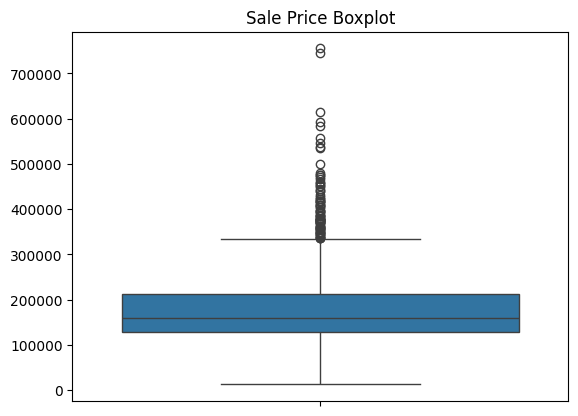

In [87]:
# | echo: False
# exploratory visualization
sns.boxplot(y_train)
plt.title("Sale Price Boxplot")
plt.ylabel("")
plt.show()

Half of all home prices lie within a relatively narrow range. There are a lot of high outliers.

### Models

In [88]:
# process data for ML

# split variable types
num_columns = X_train.select_dtypes(['int64', 'float64']).columns.to_list()
cat_columns = X_train.select_dtypes(['object']).columns.to_list()

cat_informative_missing = ['Alley', 'Mas Vnr Type', 'Pool QC', 'Fence']

# apply exclusions
exclude_columns = ['Order', 'PID']
num_columns = [col for col in num_columns if col not in exclude_columns]
cat_columns = [col for col in cat_columns if col not in exclude_columns+cat_informative_missing]

num_pipeline = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='median'))
    ]
)

cat_pipeline = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OneHotEncoder(min_frequency=70, handle_unknown='infrequent_if_exist'))
    ]
)

cat_inf_missing_pipeline = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value='informative')),
        ('encoder', OneHotEncoder(min_frequency=50, handle_unknown='infrequent_if_exist'))
    ]
)

preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', num_pipeline, num_columns),
        ('categorical', cat_pipeline, cat_columns),
        ('categorical_inf_missing', cat_inf_missing_pipeline, cat_informative_missing)
    ],
    remainder='drop'
)

pipeline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('estimator', RandomForestRegressor(n_estimators=500))
    ]
)

In [89]:
# train models
param_grid = [
    {
        "estimator": [HistGradientBoostingRegressor()],
        "estimator__learning_rate": np.linspace(0.05, 0.25, 5),
        "estimator__max_iter": [100, 200, 300],
        "estimator__max_features": np.linspace(0.1, 0.8, 8),
    }
]

model = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_absolute_percentage_error', n_jobs=-1)
_ = model.fit(X_train, y_train)

In [90]:
model.best_params_

{'estimator': HistGradientBoostingRegressor(),
 'estimator__learning_rate': np.float64(0.05),
 'estimator__max_features': np.float64(0.2),
 'estimator__max_iter': 300}

After model selection with parameter tuning and cross validation, the final model is a `HistGradientBoostingRegressor`, a boosted model. This acheives the highest train accuracy.

## Results

In [106]:
# report model metrics
y_pred = model.predict(X_test)
test_score = mean_absolute_percentage_error(y_test, y_pred)
print(f"Test MAPE: {test_score:.2%}")

Test MAPE: 8.13%


In [92]:
# | echo: false
# | output: false
# serialize model
dump(model, 'housing.joblib')

['housing.joblib']

## Discussion

I would recommend against putting this model into practice. The mean absolute percentage error is about 8%, but 8% of the average home sale price is around $14,000, not a small sum of money. The inaccuracies of this model's predictions have no threat to life, but they do pose a financial threat to people. Looking at the graph of Actual vs Predicted sale prices, we observe that the prediction errors appear to get larger for more expensive homes, which makes the cost of our inaccurate predictions even worse. Note that it generally appears that outlying errors here are in favor of the seller. The model seems to predict higher prices more often than lower prices.

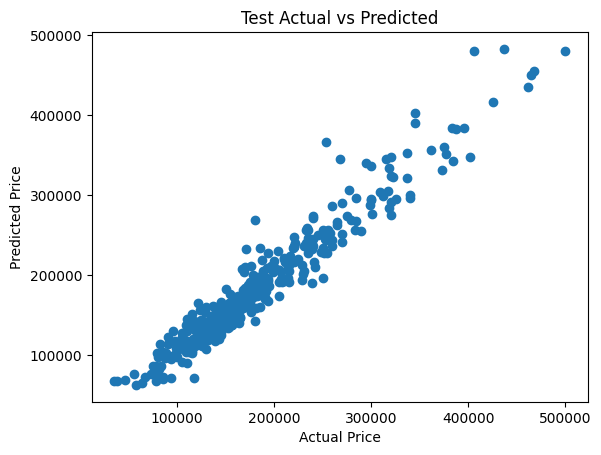

In [104]:
# | echo: False
# | lightbox: True
# summary figure
plt.scatter(y_test, y_pred)
plt.title("Test Actual vs Predicted")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.show()